In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [12]:
class State(TypedDict):
    number: int
    result: str

In [13]:
graph = StateGraph(State)

In [14]:
def check_number(state: State) -> State:
    if state['number'] < 0:
        raise ValueError("Number must be non-negative.")
    return state

def number_classify(state: State) -> Literal["even_action", "odd_action"]:
    if state['number'] % 2 == 0:
        return "even_action"
    else:
        return "odd_action"
    
def even_action(state: State) -> State:
    state['result'] = f"The number {state['number']} is even."
    return state

def odd_action(state: State) -> State:
    state['result'] = f"The number {state['number']} is odd."
    return state

In [15]:
graph.add_node('check_number', check_number)
graph.add_node('even_action', even_action)
graph.add_node('odd_action', odd_action)

In [16]:
# one tricky thing make sure you have a seperate func to define the check_number logic bcoz check_number should return the state and conditional edge should return the next node
# if you put the logic in the same function it will not work
graph.add_edge(START, 'check_number')
graph.add_conditional_edges('check_number', number_classify)
graph.add_edge('even_action', END)
graph.add_edge('odd_action', END)   

In [17]:
workflow = graph.compile()

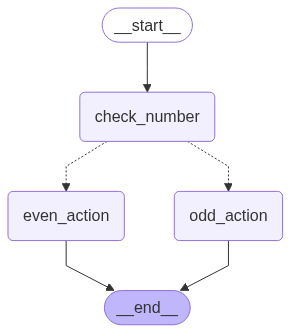

In [18]:
# to visualize the graph, you can use the following code
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [19]:
initial_state = {'number': 41}
result = workflow.invoke(initial_state)    
print("Final state:", result)

Final state: {'number': 41, 'result': 'The number 41 is odd.'}
